Reservoirs store water between timesteps.  They are nodes in the water network, and receive upstream flows and precipitation, and provide withdrawals to canals.  However, their outflows are determined by an optimization.

# Selecting Reservoirs

The reservoirs that should be modeled as storing water across period, rather than acting like stream nodes, differ depending on the timestep.  The function that provides a list of reservoirs is `getreservoirs(config)`.

In [1]:
include("../src/lib/readconfig.jl")
include("../src/lib/reservoirs.jl")

config = readconfig("../configs/standard.yml")

Dict{Any,Any} with 11 entries:
  "urbandemand-index"     => "FIPS_county"
  "filterstate"           => nothing
  "urbandemand-transform" => "repcap"
  "startweather"          => 612
  "timestep"              => 6
  "urbandemand-column"    => "per_capita"
  "startmonth"            => "10/2000"
  "rescap"                => "full"
  "urbandemand-path"      => "demand/urbandemand_May11.csv"
  "netset"                => "usa"
  "endmonth"              => "9/2010"

In [2]:
@doc getreservoirs

Return a DataFrame containing `collection` and `colid` fields matching those in the Water Network.

Any additional columns can be provided, to be used by other components.

Rows may be excluded, to represent that a given reservoir should be modeled as a stream at the specified timestep (in months).


In [3]:
getreservoirs(config)

,collection,colid,area,lat,lon,elev,MAXCAP
1,reservoir,1,NA,48.8733,-122.688,NA,6.907488e6
2,reservoir,2,145.03944,48.7583,-122.422,NA,9.497796e7
3,reservoir,3,556.84785,48.6583,-121.687,NA,2.185529203e8
4,reservoir,4,556.84785,48.6483,-121.69,NA,3.89903028e8
5,reservoir,5,2587.40001,48.7317,-121.067,NA,2.014766232e9
6,reservoir,6,2913.73875,48.7133,-121.13,NA,1.12986768e8
7,reservoir,7,3001.79841,48.6983,-121.207,NA,1.32969144e7
8,reservoir,8,769.22703,48.5483,-121.74,NA,1.991700156e8
9,reservoir,9,NA,48.9317,-119.418,NA,4.93392e7
10,reservoir,10,797.71692,48.095,-123.555,NA,9.991188e6


# Optimization example

To understand the functioning of reservoirs, consider how they work in a very simple three gauge example.  The three guages example has three counties, with a river running through them.  The middle county has a reservoir.  Water is supplied only upstream (in counties 1 and 2) and consumed only downstream (in counties 2 and 3).

![Three counties diagram](https://raw.githubusercontent.com/AmericasWater/operational-problem/master/docs/three.png)

Note that the reservoir appears to be outside of the river system.  While it is spatially synonymous with the middle gauge, reservoirs get all of their inflows from "captured" water.  Any water that is not captured is allowed to run through the reservoir just like a stream.  Reservoir captures can also be negative, providing releases.

The `optimize-surface.jl` script models the constraints to satisfy surface water demands, using reservoirs to store water between periods.

In the three counties example, the first period has more rainfall than the second period, so that storage is optimal.

In [25]:
config = readconfig("../configs/dummy3.yml")
include("../src/optimize-surface.jl")

Loading from saved region network...
Loading from saved water network...


Optimize a model with 33 rows, 30 columns and 78 nonzeros
Coefficient statistics:
  Matrix range    [1e+00, 1e+00]
  Objective range [1e+03, 1e+03]
  Bounds range    [0e+00, 0e+00]
  RHS range       [8e-01, 7e+00]
Presolve removed 21 rows and 14 columns
Presolve time: 0.01s
Presolved: 12 rows, 16 columns, 33 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.9800000e+02   1.646210e+01   0.000000e+00      0s
      11    4.2100000e+03   0.000000e+00   0.000000e+00      0s

Solved in 11 iterations and 0.01 seconds
Optimal objective  4.210000000e+03
  5.013757 seconds (3.15 M allocations: 125.856 MB, 4.76% gc time)


supersourcesupply
[0.0,0.0,0.20000000000000018,0.0,1.0050000000000001,2.0,0.0,1.0049999999999994,0.0]
Sum: 4.209999999999999
withdrawals
[0.0,2.0,1.7999999999999998,0.0,0.9949999999999999,0.0,0.0,0.9950000000000006,2.0]
Sum: 7.790000000000001
returns
All zero.
captures
[-0.8,0.0050000000000001155,0.0049999999999999]
Sum: -0.79


24

First, look at the runoff values, with rows for the three gauges and columns for the two time periods.

In [26]:
runoff

3x3 Array{Float64,2}:
 2.0  1.0  2.2
 1.0  0.0  0.7
 0.0  0.0  0.1

The requirements are for one unit of water each period for each of the lower two gauges.

In [28]:
reshape(constraintoffset_allocation_recordedbalance(m).f, 3, 3)

3x3 Array{Float64,2}:
 0.0  0.0  0.0
 2.0  2.0  2.0
 2.0  2.0  2.0

The order of the parameters in the LP problem is:

In [29]:
parameters

4-element Array{Symbol,1}:
 :supersourcesupply
 :withdrawals         
 :returns             
 :captures            

And the order of the constraint variables is:

In [30]:
constraints

5-element Array{Symbol,1}:
 :outflows     
 :balance      
 :returnbalance
 :storagemin   
 :storagemax   

Consider the constraint matrix one parameter at a time.  The first parameter is the water drawn from the supersource, which only affects the second constraint, `:balance`, the difference between water demand and water supply.  The objective function is such that supersource withdrawals are avoided.

In [33]:
full(house.A)[:, 1:9]

33x9 Array{Float64,2}:
  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
 -1.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
  0.0  -1.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0  -1.0   0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0  -1.0  0.0  0.0  0.0  0.0  0.0
  ⋮                           ⋮                 
  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0

Normal withdrawals affect `:balance` as well, but they also affect the level of streamflow, which is constrained to be above 0.  See the top six rows in two blocks, in the upper left and lower right, corresponding to the two periods.  The gauges are ordered, by chance, such that the most upstream gauge is second, so a withdrawal from that gauge causes all three gauges to inch closer to empty.

In [34]:
full(house.A)[:, 10:18]

33x9 Array{Float64,2}:
  1.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
  1.0   1.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
  1.0   1.0   1.0   0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   1.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   1.0  1.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   1.0  1.0  1.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  1.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  1.0  1.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  1.0  1.0  1.0
 -1.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
  0.0  -1.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0  -1.0   0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0  -1.0  0.0  0.0  0.0  0.0  0.0
  ⋮                           ⋮                 
  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0

We'll ignore the `:returns` constraint.  The last is the reservoir in the two periods.  Reservoir captures have the same affect on streamflows, at least downstream.  They have no direct effect on `:balance`.  Finally, they affect the last two constraints on the upper and lower bounds of the reservoir, where capture (or release) in period 1 affects both periods, while capture (or release) in period 2 only affects one.

In [35]:
full(house.A)[:, end-1:end]

33x2 Array{Float64,2}:
  0.0    0.0
  0.0    0.0
  0.0    0.0
  0.0    0.0
  0.0    0.0
  1.0    0.0
  0.0    0.0
  0.0    0.0
  0.0    1.0
  0.0    0.0
  0.0    0.0
  0.0    0.0
  0.0    0.0
  ⋮         
  0.0    0.0
  0.0    0.0
  0.0    0.0
  0.0    0.0
  0.0    0.0
  0.0    0.0
  0.0    0.0
 -1.0    0.0
 -0.99  -1.0
  0.0    0.0
  1.0    0.0
  0.99   1.0

The result is that it is optimal to store one unit of water and release it in the second period.

In [36]:
constraining(house, sol.sol)

Ignore:

0.25
0.5
0.75
1.0


,solution,component,parameter,abovefail,belowfail
1,0.0,Allocation,supersourcesupply,,balance.1
2,0.0,Allocation,supersourcesupply,,balance.2
3,0.20000000000000018,Allocation,supersourcesupply,,balance.3
4,0.0,Allocation,supersourcesupply,,balance.4
5,1.0050000000000001,Allocation,supersourcesupply,,balance.5
6,2.0,Allocation,supersourcesupply,,balance.6
7,0.0,Allocation,supersourcesupply,,balance.7
8,1.0049999999999994,Allocation,supersourcesupply,,balance.8
9,0.0,Allocation,supersourcesupply,,balance.9
10,0.0,Allocation,withdrawals,outflows.3,balance.1


Future work:
- The optimization does not include evaporation, since this would make the numbers for this toy example inconvenient.  Evaporation needs to be added to both the optimization and the example.

# Reservoir data

### Maximum Reservoir Storage (or Capacity)

Received Maximum capacity for 2641 reservoirs from the US Army Corps of Engineers. However, in the allreservoirs.csv file in the folder awash/data/reservoirs/,there are 2671 reservoirs in total. 

The allreservoir.csv database is being used in the reservoir optimization (reservoir.jl). The remaining 30 reservoirs are from the USGS website. 

Since we are unable to currently find the maximum capacity for those 30 reservoirs (reservoir codes mentioned below), for this example, the maximum capacity is taken as 0.

usgsres	3170500
usgsres	5113750
usgsres	6886900
usgsres	7233550
usgsres	7332610
usgsres	7342495
usgsres	7343460
usgsres	7344488
usgsres	8025350
usgsres	8051100
usgsres	8064550
usgsres	8072500
usgsres	8073000
usgsres	8079700
usgsres	8092500
usgsres	8095550
usgsres	8118000
usgsres	8123000
usgsres	8123755
usgsres	8123950
usgsres	8131200
usgsres	8134500
usgsres	8136600
usgsres	8180010
usgsres	8202800
usgsres	9125800
usgsres	9129550
usgsres	9143600
usgsres	9147022
usgsres	15225990


### Minimum reservoir storage

The minimum reservoir storage is assumed to be 10% of the maximum reservoir storage, i.e.

storagecapacitymin = 0.1 * storagecapacitymax

This data needs improvement -- we need to find the minimum storage for each reservoir rather than taking one assumptions for all reservoirs

### Initial Storage

The initial storage is assumed to be the average of minimum and maximum capacity, i.e.

Initial storage = (storagecapacitymax-storagecapacitymin)/2

This data needs improvement -- we need to find the initial storage of each reservoir

### Evaporation

Evaporation is currently assumed to be 1% of the storage capacity, i.e.

Evaporation = 0.01 * storagecapacitymax

The data needs improvement -- we need to find a linear relationship between evaporation and reservoir storage.

### Evaporation 2

In [1]:
using GeoArrays

In [2]:
include("../src/lib/readconfig.jl")

configdescends

In [3]:
include("../src/lib/reservoirs.jl")

reservoirloss

In [4]:
config = readconfig("../configs/standard.yml")
reservoirs = getreservoirs(config)

,collection,colid,area,lat,lon,elev,MAXCAP,fips,height
,String,String,Float64⍰,Float64,Float64,Float64⍰,Float64,String⍰,Float64⍰
1,reservoir,1,missing,48.8733,-122.688,missing,6.90749e6,53073,2.1336
2,reservoir,2,145.039,48.7583,-122.422,missing,9.4978e7,53073,4.2672
3,reservoir,3,556.848,48.6583,-121.687,missing,2.18553e8,53073,13.4112
4,reservoir,4,556.848,48.6483,-121.69,missing,3.89903e8,53073,89.916
5,reservoir,5,2587.4,48.7317,-121.067,missing,2.01477e9,53073,125.882
6,reservoir,6,2913.74,48.7133,-121.13,missing,1.12987e8,53073,101.194
7,reservoir,7,3001.8,48.6983,-121.207,missing,1.32969e7,53073,47.244
8,reservoir,8,769.227,48.5483,-121.74,missing,1.9917e8,53057,84.7344
9,reservoir,9,missing,48.9317,-119.418,missing,4.93392e7,53047,4.572


In [5]:
evap = ncread(loadpath("global/evaporation-monthly.nc4"), "evap")
gevap = GeoArray(evap[:, :, 1, :])
bbox!(gevap, (min_x=-125.5, min_y=24.5, max_x=-65.5, max_y=50.5))
epsg!(gevap, 4326)

61x27x12 Array{Float32,3} with AffineMap([0.9836065573770492 0.0; 0.0 0.9629629629629629], [-125.5, 24.5]) and CRS GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]

In [6]:
allresmon = Union{Float64, Missing}[]
for ii in 1:nrow(reservoirs)
    rc = indices(gevap, [reservoirs[ii, :lon], reservoirs[ii, :lat]])
    for mm in 7
        ev = gevap[rc[1], rc[2], mm]
        push!(allresmon, reservoirloss(convert(Float64, ev), .5 * reservoirs[ii, :MAXCAP] / 1000, reservoirs[ii, :MAXCAP] / 1000; depth=reservoirs[ii, :height]))
    end
end

In [7]:
using Statistics
mean(allresmon)

0.01651071623412064

In [8]:
median(allresmon)

0.00036891553626794416

In [9]:
sum(allresmon .>= 0.01)

42

In [10]:
sum(allresmon .< 1e-5)

98

In [12]:
using Gadfly

┌ Info: Recompiling stale cache file /Users/jrising/.julia/compiled/v1.2/Gadfly/DvECm.ji for Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004]
└ @ Base loading.jl:1240
┌ Warning: Module CategoricalArrays with build ID 1365724468361236 is missing from the cache.
│ This may mean CategoricalArrays [324d7699-5711-5eae-9e2f-1d82baa6b597] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1000
┌ Info: Skipping precompilation since __precompile__(false). Importing Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004].
└ @ Base loading.jl:1017
┌ Info: Recompiling stale cache file /Users/jrising/.julia/compiled/v1.2/CoupledFields/qrVrT.ji for CoupledFields [7ad07ef1-bdf2-5661-9d2b-286fd4296dac]
└ @ Base loading.jl:1240
┌ Warning: Module Compat with build ID 1058901416198651 is missing from the cache.
│ This may mean Compat [34da2185-b29b-5c13-b0c7-acf172513d20] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1000
┌ Info: Ski

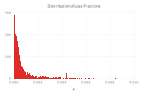

In [15]:
df = DataFrame(x=allresmon[allresmon .< 1])
hist_layer=layer(df,x=:x,Geom.histogram,Theme(default_color=colorant"#de2d26"))
hist_plot_default=plot(hist_layer, Guide.title("Distribution of Loss Fractions"))